# TP Programmation avec Keras - Cas MNIST, niveau de confiance

Dans ce TP, nous allons associer un niveau de confiance à nos prédictions en utilisant la méthode du MC-Dropout. Cette méthode consiste à garder le Dropout actif en phase de test, et d'utiliser la propriété aléatoire du Dropout pour obtenir une variabilité sur les sorties du réseau : une grande variabilité implique un faible niveau de confiance et inversement.

Dans ce TP, des cellules seront laissées à trous, il faudra les compléter suivant les consignes. Elles seront identifiées par le mot **Exercice**. Les **Vérifications** seront effectuées principalement par vous-mêmes, sur la bonne convergence des algorithmes ou leur bon fonctionnement.

Ci-dessous, on importe les bibliothèques qui seront utiles.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

## Mise en place des données

Le code ci-dessous charge les données MNIST.

In [2]:
#NE PAS MODIFIER

(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

**Exercice** : Normalisez les données d'entrées en les divisant par 255 et passez les données de sortie sous forme catégorielle (one hot encoding, en utilisant keras.utils.to_categorical)

In [3]:
X_train = X_train/255

X_test = X_test/255

Y_train_cat = keras.utils.to_categorical(Y_train,num_classes = 10)

Y_test_cat = keras.utils.to_categorical(Y_test,num_classes = 10)

**Exercice** : Adaptez le nombre de dimensions de X_train et X_test pour utiliser des couches de convolutions 2D.

In [4]:
X_train = np.expand_dims(X_train,axis = 3)

X_test = np.expand_dims(X_test,axis = 3)

## Modèle Keras

### Création du modèle avec convolution

**Exercice** : Créez un modèle avec Keras que vous appellerez "my_model".

**Instructions spécifiques** : 
- Utilisez le format ci-dessous : ce n'est plus un format séquentiel car il faut une option spécifique pour conserver le Dropout actif lors de la phase de test.
- Inspirez vous du format pour créer en séquence :
  - x = your_layer_1(arguments)(x)
  - x = your_layer_2(arguments)(x)
  - ....
  - outputs = your_final_layer(arguments)(x)
- Pour les couches de Dropout, ajoutez à côté de l'argument x, le mot-clé training = True, qui permet de garder la Dropout actif en phase de prédiction. 

In [5]:
inputs = keras.layers.Input((28,28,1))

x = keras.layers.Conv2D(4,5,input_shape = (28,28,1),activation = "relu")(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(2)(x)

x = keras.layers.Conv2D(4,5,activation = "relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(2)(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128,activation = "relu", kernel_regularizer = keras.regularizers.l2(0.01))(x)
x = keras.layers.Dropout(0.1)(x,training = True)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Dense(128,activation = "relu", kernel_regularizer = keras.regularizers.l2(0.01))(x)
x = keras.layers.Dropout(0.1)(x,training = True)
x = keras.layers.BatchNormalization()(x)

outputs = keras.layers.Dense(10,activation = "softmax", kernel_regularizer = keras.regularizers.l2(0.01))(x)

my_model = keras.models.Model(inputs,outputs)


**Exercice** : Affichez la structure de votre modèle avec my_model.summary()

In [6]:
my_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 4)         104       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 4)         16        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 4)           404       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 4)           16        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 4)          

**Vérification** : Pour l'instant, il suffit qu'il n'y ait pas d'erreur.

### Compilation du modèle

**Exercice** : Compilez le modèle avec l'optimizer que vous souhaitez. Mettez une loss function adaptée ainsi qu'une métrique adaptée.

In [7]:
opt = keras.optimizers.Adam(lr = 0.01)
my_model.compile(optimizer = opt, loss = "categorical_crossentropy",metrics = ["categorical_accuracy"])

**Vérification** : De nouveau, s'il n'y a pas d'erreur et que vous avez suivi les instructions, tout devrait bien se passer.

### Mise en place de l'early stopping

**Exercice** : Définissez un early-stopping.

In [8]:
early_stopping = keras.callbacks.EarlyStopping(monitor = "val_loss",patience = 10,restore_best_weights=True)

## L'apprentissage

**Exercice** : Effectuez l'apprentissage classiquement.

In [9]:
learning = my_model.fit(X_train,Y_train_cat,epochs = 20, batch_size = 128,validation_split = 0.1,callbacks = [early_stopping])

Epoch 1/20
422/422 [==============================] - 12s 27ms/step - loss: 0.6733 - categorical_accuracy: 0.9198 - val_loss: 0.5164 - val_categorical_accuracy: 0.9330
Epoch 2/20
422/422 [==============================] - 11s 26ms/step - loss: 0.4674 - categorical_accuracy: 0.9415 - val_loss: 0.5755 - val_categorical_accuracy: 0.9107
Epoch 3/20
422/422 [==============================] - 11s 26ms/step - loss: 0.4217 - categorical_accuracy: 0.9463 - val_loss: 0.4207 - val_categorical_accuracy: 0.9503
Epoch 4/20
422/422 [==============================] - 11s 26ms/step - loss: 0.4184 - categorical_accuracy: 0.9456 - val_loss: 0.4784 - val_categorical_accuracy: 0.9320
Epoch 5/20
422/422 [==============================] - 12s 28ms/step - loss: 0.3934 - categorical_accuracy: 0.9473 - val_loss: 0.3348 - val_categorical_accuracy: 0.9592
Epoch 6/20
422/422 [==============================] - 13s 30ms/step - loss: 0.3838 - categorical_accuracy: 0.9476 - val_loss: 0.3765 - val_categorical_accuracy:

**Vérification** : La loss function devrait diminuer et l'accuracy augmenter. De même pour le jeu de validation.

**Exercice** : Tracez l'évolution de la fonction de coût et de l'accuracy pour le jeu d'entraînement et pour le jeu de validation.

Text(0.5, 1.0, 'Categorical accuracy evolution')

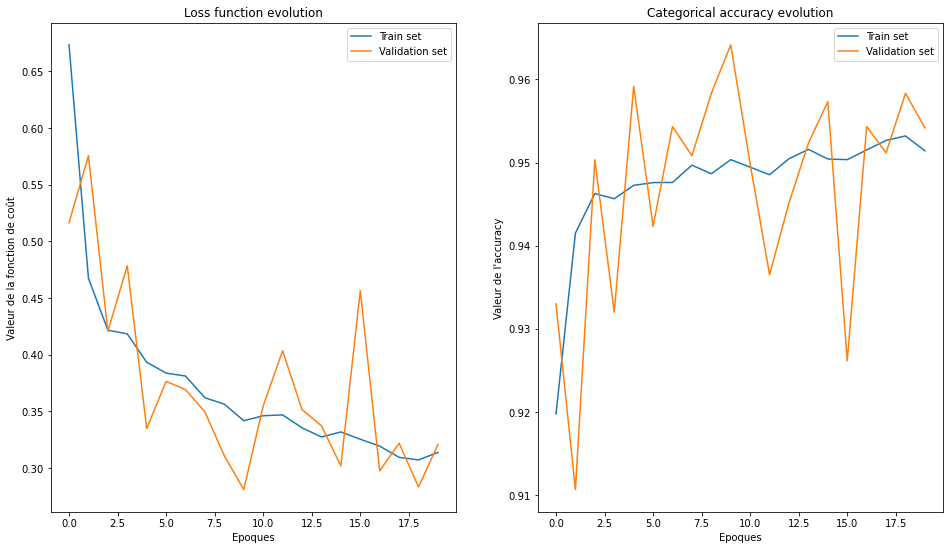

In [10]:
loss_evolution = learning.history["loss"]
acc_evolution = learning.history["categorical_accuracy"]
val_loss_evolution = learning.history["val_loss"]
val_acc_evolution = learning.history["val_categorical_accuracy"]


plt.figure(figsize = (16,9))
plt.subplot(121)
plt.plot(loss_evolution,label = "Train set")
plt.plot(val_loss_evolution,label = "Validation set")
plt.xlabel("Epoques")
plt.ylabel("Valeur de la fonction de coût")
plt.legend()
plt.title("Loss function evolution")

plt.subplot(122)
plt.plot(acc_evolution, label = "Train set")
plt.plot(val_acc_evolution, label = "Validation set")
plt.xlabel("Epoques")
plt.ylabel("Valeur de l'accuracy")
plt.legend()
plt.title("Categorical accuracy evolution")

## Prédictions avec le modèle

**Exercice** : Prenez un exemple au hasard et affichez plusieurs fois sa prédiction. Vous remarquerez qu'elle est différente à chaque appel de votre réseau de neurones.

In [11]:
i = 0

print(my_model.predict(X_test[i:(i+1)]))
print(my_model.predict(X_test[i:(i+1)]))
print(my_model.predict(X_test[i:(i+1)]))

[[5.0609634e-04 1.9284370e-03 6.3964101e-03 1.0247240e-03 3.9767777e-03
  5.2243209e-04 6.4199173e-04 9.7877914e-01 1.7287271e-03 4.4953474e-03]]
[[6.77158937e-07 2.49836630e-05 1.19289551e-04 1.06063526e-04
  1.54084228e-05 1.26109007e-05 9.04645105e-07 9.99472439e-01
  7.53009044e-06 2.40130743e-04]]
[[2.1267314e-07 1.2143480e-05 5.7422414e-05 2.5772380e-05 3.3606900e-06
  5.1884172e-06 3.0057521e-07 9.9980623e-01 3.5656988e-06 8.5849788e-05]]


Nous allons caractériser la variabilité dans les prédictions. Pour ce faire, nous allons utiliser la théorie de l'information pour construire des métriques adaptées à la caractérisation de ces incertitudes (auto-évaluées par le réseau).

Nous allons déjà pour une seul prédiction, caractériser l'incertitude sur cette prédiction en fonction des probabilités associées à chaque classe. L'idée est que, si la prédiction associe une forte probabilité sur une classe et une probabilité faible sur les autres classes, la prédiction est "sûre d'elle". Inversement, si elle associe une faible probabilité à toutes les classe, cette prédiction est moins certaine.

Cet aspect se caractérise par **l'entropie de Shannon**, définie de la manière suivante : 

\begin{equation}
\mathcal{H}(\hat{Y}) = -\sum_{i = 1}^{K} \hat{y_i}\log(\hat{y_i}) 
\end{equation}

Ici l'indice $i$ parcourt l'ensemble des classes considérées dans le problème, $\hat{y}$ est la prédiction.

**Exercice** : Codez l'entropie de Shannon ci-dessous. Considérez que $y$ est un tableau à plusieurs dimensions et que l'on souhaite calculer l'entropie suivant un axe particulier (argument ax) qui représente les différentes classes.

In [15]:
def shannon_entr(y,ax):

  entr = np.sum(-y*np.log(y),axis = ax)

  return entr

**Vérification** : Exécutez la cellule suivante.

In [16]:
np.random.seed(seed = 1)

y_hat = np.random.rand(3,10)

print(shannon_entr(y_hat,1))

[2.84552209 2.71503273 1.79409548]


Le résultat doit être [2.84552209 2.71503273 1.79409548]

Maintenant, nous allons effectuer plusieurs prédictions pour un même exemple, nous aurons une variabilité avec le Monte-Carlo Dropout. L'incertitude totale sera caractérisée par l'entropie de Shannon sur la prédiction moyenne. L'incertitude intrinsèque aux données caractérisée par le réseau (incertitude dite aléatoire) sera donnée par la moyenne des entropies de Shannon. Enfin, l'incertitude dûe à la variabilité des modèle sera donnée par la différence entre les deux quantités précédemment calculées.

Mathématiquement, cela donne :

  - $\mathcal{H}(\mathbb{E}_{w}(\hat{Y}))$ est l'incertitude totale (l'indice $w$ signifie que l'espérance est donnée par la variabilité engendrée par les poids du réseau avec le MC-Dropout)
  - $\mathbb{E}_{w}(\mathcal{H}(\hat{Y}))$ est l'incertitude aléatoire
  - $\mathcal{I}(\hat{Y};w) = \mathcal{H}(\mathbb{E}_{w}(\hat{Y})) - \mathbb{E}_{w}(\mathcal{H}(\hat{Y}))$ est l'incertitude épistémique. On appelle cette quantité l'information mutuelle et caractérise le lien entre la prédiction et la variabilité des poids du réseau dûe au MC-Dropout.

**Exercice** : Prenez un exemple, dupliquez le une centaine de fois sur l'axe 0 à l'aide de la fonction np.repeat.

In [17]:
i = 0

X_test_i = X_test[i:(i+1)]

X_test_dup = np.repeat(X_test_i,100,axis = 0)

**Exercice** : Effectuez une prédiction sur cet exemple dupliqué.

In [18]:
Y_pred_dup = my_model.predict(X_test_dup)

**Exercice** : À partir de cette prédiction, calculez l'incertitude aléatoire. Pour rappel, avec la formule donnée ci-dessus, l'incertitude alétoire correspond à la moyenne des entropies de Shannon sur les différentes prédictions.

In [22]:
incert_aleat = np.mean(shannon_entr(Y_pred_dup,1))

print(incert_aleat)

0.012781536


**Exercice** : De même, à partir de la prédiction, calculez l'incertitude totale : elle correspond à l'entropie de Shannon calculée sur la moyenne des différentes prédictions.

In [24]:
incert_tot = shannon_entr(np.mean(Y_pred_dup,0),0)

print(incert_tot)

0.018332122


**Exercice** : Enfin, calculez la part épistémique, qui correspond donc à la différence entre l'incertitude totale et la part aléatoire.

In [26]:
incert_epist = incert_tot - incert_aleat

print(incert_epist)

0.0055505857


### Essais sur l'ensemble de la base de test

Le code ci-dessous permet de dupliquer l'ensemble de la base de test une centaine de fois. Il duplique dans un premier temps le vecteur de test le long d'un axe supplémentaire, puis exécute un reshape pour avoir un tableau de dimensions (nombre d'exemples x m_c, dimensions des images).

In [51]:
n_mc = 100

X_test_tot_dup = np.expand_dims(X_test,axis = 1)

X_test_tot_dup = np.repeat(X_test_tot_dup,n_mc,axis = 1)

X_test_tot_dup = np.reshape(X_test_tot_dup,(n_mc*X_test.shape[0],X_test.shape[1],X_test.shape[2],X_test.shape[3]))

**Exercice** : Effectuez une prédiction sur cette base de test dupliquée.

In [52]:
Y_pred_tot = my_model.predict(X_test_tot_dup)

La taille de ce tableau de prédiction est maintenant (n_exemples x n_mc, 10). Pour faire un calcul de l'entropie de Shannon, il faut rassembler les prédictions correspondant au même exemple dans une même dimension : l'idée est d'obtenir un tableau de taille finale (n_exemples, n_mc, 10).

**Exercice** : Utilisez la fonction np.reshape pour atteindre cette taille.

In [53]:
Y_pred_tot = np.reshape(Y_pred_tot,(X_test.shape[0],n_mc,10))

**Exercice** : Calculez l'incertitude aléatoire pour l'ensemble des prédictions. Votre résultat doit être un vecteur de taille n_exemples (de taille 10 000).

**Hint** : La difficulté principale à gérer est l'axe sur lequel il faut calculer l'entropie puis celui sur lequel il faut calculer la moyenne.

In [54]:
incert_aleat_tot = np.mean(shannon_entr(Y_pred_tot,2),axis = 1)

print(incert_aleat_tot.shape)

(10000,)


**Exercice** : De même, effectuez le calcul de l'incertitude totale pour l'ensemble des prédictions. Stockez aussi le vecteur donnant la moyenne des prédictions dans le vecteur Y_mean.

In [55]:
Y_mean = np.mean(Y_pred_tot,axis = 1)

incert_totale_tot = shannon_entr(Y_mean,1)

print(incert_totale_tot.shape)

(10000,)


**Exercice** : Enfin, calculez la part épistémique.

In [63]:
incert_epist_tot = incert_totale_tot - incert_aleat_tot

**Exercice** : Classez les exemples selon la valeur de leur incertitude aléatoire et visualisez ceux avec la plus grande incertitude aléatoire. La fonction np.argsort sera utile.

Text(0.5, 1.0, 'Incertitude aléatoire : 1.9817345\nIncertitude épistémique : 0.06230092\nIncertitude totale : 2.0440354')

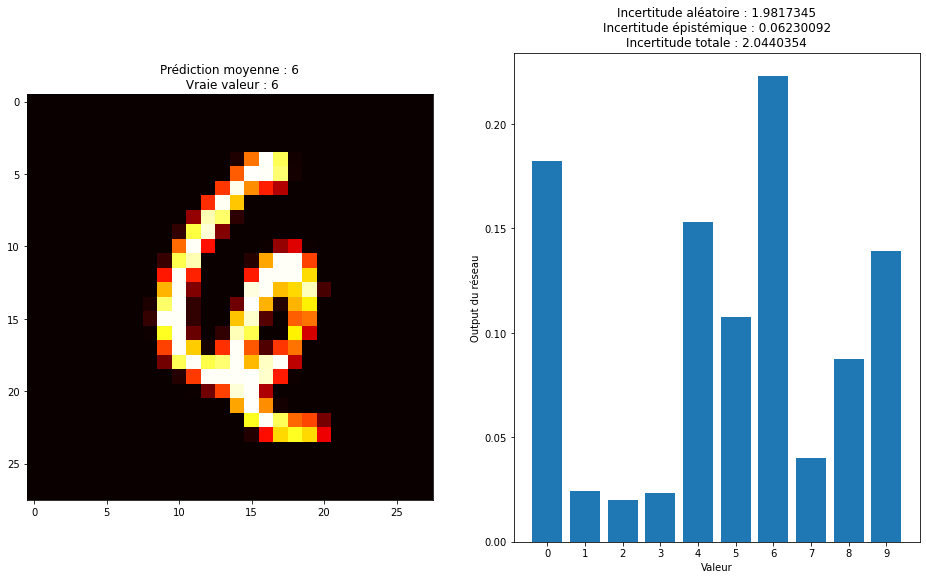

In [75]:
index_sort = np.argsort(incert_aleat_tot)

index = index_sort[-2]

label_pred = np.argmax(Y_mean[index])

figure = plt.figure(figsize = (16,9))

ax1 = plt.subplot(121)
ax1.imshow(X_test[index,:,:],cmap = "hot")
plt.title("Prédiction moyenne : " + str(label_pred) + "\n Vraie valeur : " + str(Y_test[index]))

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = Y_mean[index],tick_label = np.arange(10))
plt.xlabel("Valeur")
plt.ylabel("Output du réseau")
plt.title("Incertitude aléatoire : " + str(incert_aleat_tot[index]) + 
          "\nIncertitude épistémique : " + str(incert_epist_tot[index])+
          "\nIncertitude totale : " + str(incert_totale_tot[index]))


**Exercice** : Faites de même pour l'incertitude épistémique

Text(0.5, 1.0, 'Incertitude aléatoire : 0.85571253\nIncertitude épistémique : 0.31258428\nIncertitude totale : 1.1682968')

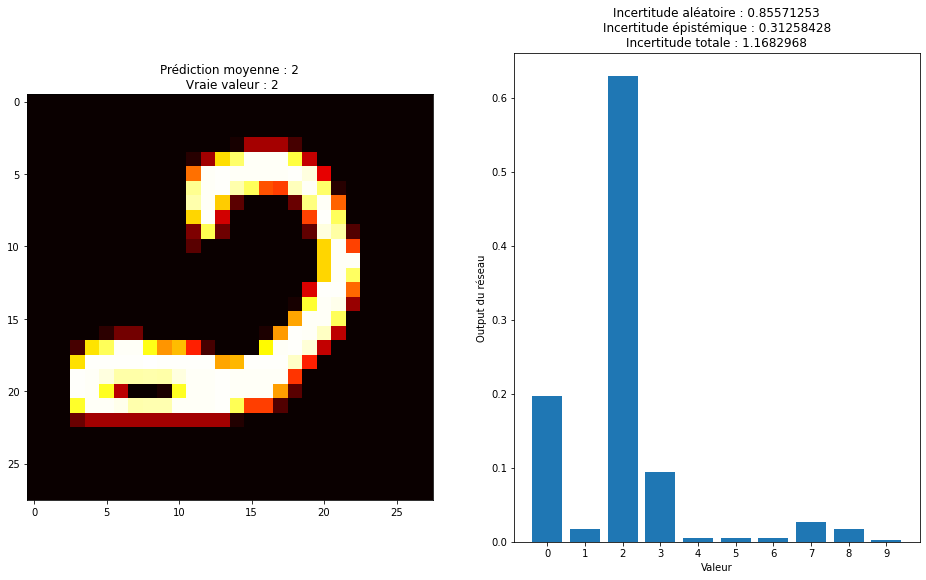

In [76]:
index_sort = np.argsort(incert_epist_tot)

index = index_sort[-2]

label_pred = np.argmax(Y_mean[index])

figure = plt.figure(figsize = (16,9))

ax1 = plt.subplot(121)
ax1.imshow(X_test[index,:,:],cmap = "hot")
plt.title("Prédiction moyenne : " + str(label_pred) + "\n Vraie valeur : " + str(Y_test[index]))

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = Y_mean[index],tick_label = np.arange(10))
plt.xlabel("Valeur")
plt.ylabel("Output du réseau")
plt.title("Incertitude aléatoire : " + str(incert_aleat_tot[index]) + 
          "\nIncertitude épistémique : " + str(incert_epist_tot[index])+
          "\nIncertitude totale : " + str(incert_totale_tot[index]))

**Exercice** : Enfin, faites de même pour l'incertitude totale.

Text(0.5, 1.0, 'Incertitude aléatoire : 1.9817345\nIncertitude épistémique : 0.06230092\nIncertitude totale : 2.0440354')

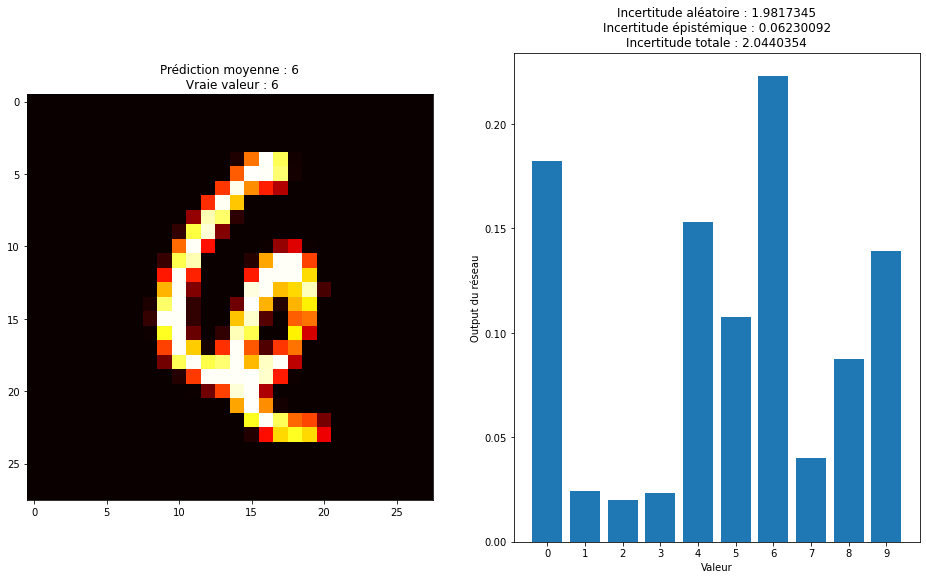

In [77]:
index_sort = np.argsort(incert_totale_tot)

index = index_sort[-2]

label_pred = np.argmax(Y_mean[index])

figure = plt.figure(figsize = (16,9))

ax1 = plt.subplot(121)
ax1.imshow(X_test[index,:,:],cmap = "hot")
plt.title("Prédiction moyenne : " + str(label_pred) + "\n Vraie valeur : " + str(Y_test[index]))

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = Y_mean[index],tick_label = np.arange(10))
plt.xlabel("Valeur")
plt.ylabel("Output du réseau")
plt.title("Incertitude aléatoire : " + str(incert_aleat_tot[index]) + 
          "\nIncertitude épistémique : " + str(incert_epist_tot[index])+
          "\nIncertitude totale : " + str(incert_totale_tot[index]))

Vous pouvez si vous le souhaitez continue d'étudier ces données, en produisant l'histogramme des incerti, en regardant la corrélation entre les erreurs et